# Fire Modes Comparison

## Setting Up

In [1]:
import pandas as pd
from weapon import burst
from accuracy import average_to_hit

weapon_stats = pd.read_csv("datasets/weapon_stats.csv")
ammo_stats = pd.read_csv("datasets/ammo_stats.csv")
weapon_firemodes = pd.read_csv("datasets/weapon_firemodes.csv")

## Data Merge

In [2]:
weapon_attacks = weapon_stats.merge(ammo_stats, on="weapon")
weapon_attacks = weapon_attacks.merge(weapon_firemodes, on="weapon")
weapon_attacks = weapon_attacks.sort_values(by=["weapon", "fire_mode"])
weapon_attacks.head()

,weapon,grip,ammo,damage,damage_type,capacity,fire_mode,time_units,accuracy
47,alien_grenade,1,alien_grenade,90,high_explosive,1.0,grenade,75,65
13,auto_cannon,2,auto_cannon_ap,42,armor_piercing,14.0,aimed,80,82
16,auto_cannon,2,auto_cannon_he,44,high_explosive,14.0,aimed,80,82
19,auto_cannon,2,auto_cannon_inc,48,incendiary,14.0,aimed,80,82
11,auto_cannon,2,auto_cannon_ap,42,armor_piercing,14.0,auto,40,32


## Chance to Hit

We will use an average Accuracy of 50. Meaning the soldier fails half of the time.

The chance of hit formula is simple. Just multiply the soldier's accuracy chance by the weapon's accuracy chance. So an average of 50 to a weapon of Accuracy 90 means 0.50 * 0.9 = 0.45 chance of hit.

In [3]:
weapon_attacks["chance_to_hit"] = weapon_attacks.apply(lambda x: average_to_hit(x["accuracy"]), axis=1)
weapon_attacks.head()

,weapon,grip,ammo,damage,damage_type,capacity,fire_mode,time_units,accuracy,chance_to_hit
47,alien_grenade,1,alien_grenade,90,high_explosive,1.0,grenade,75,65,0.3575
13,auto_cannon,2,auto_cannon_ap,42,armor_piercing,14.0,aimed,80,82,0.4510
16,auto_cannon,2,auto_cannon_he,44,high_explosive,14.0,aimed,80,82,0.4510
19,auto_cannon,2,auto_cannon_inc,48,incendiary,14.0,aimed,80,82,0.4510
11,auto_cannon,2,auto_cannon_ap,42,armor_piercing,14.0,auto,40,32,0.1760


## Additional Data

In [4]:
weapon_attacks["burst"] = weapon_attacks.apply(burst, axis=1)
weapon_attacks["damage_expected"] = weapon_attacks.apply(lambda x: x["damage"] * x["chance_to_hit"], axis=1)
weapon_attacks.head()

,weapon,grip,ammo,damage,damage_type,capacity,fire_mode,time_units,accuracy,chance_to_hit,burst,damage_expected
47,alien_grenade,1,alien_grenade,90,high_explosive,1.0,grenade,75,65,0.3575,1,32.175
13,auto_cannon,2,auto_cannon_ap,42,armor_piercing,14.0,aimed,80,82,0.4510,1,18.942
16,auto_cannon,2,auto_cannon_he,44,high_explosive,14.0,aimed,80,82,0.4510,1,19.844
19,auto_cannon,2,auto_cannon_inc,48,incendiary,14.0,aimed,80,82,0.4510,1,21.648
11,auto_cannon,2,auto_cannon_ap,42,armor_piercing,14.0,auto,40,32,0.1760,3,7.392


## Fire Modes Data

In [5]:
weapon_firemodes = weapon_attacks[ ["fire_mode", "time_units", "chance_to_hit", "damage_expected"] ]
weapon_firemodes = weapon_firemodes.groupby("fire_mode").mean()
weapon_firemodes

,time_units,chance_to_hit,damage_expected
fire_mode,,,
aimed,67.875000,0.528688,43.285917
auto,35.000000,0.220000,13.527556
grenade,75.000000,0.357500,28.600000
melee,30.000000,0.550000,35.750000
snapshot,34.863636,0.347250,25.492250


## Chance to Hit

In [6]:
weapon_firemodes_to_hit = weapon_firemodes[["chance_to_hit"]]
weapon_firemodes_to_hit = weapon_firemodes_to_hit.sort_values(by=["chance_to_hit"])

Text(0, 0.5, 'Chance')

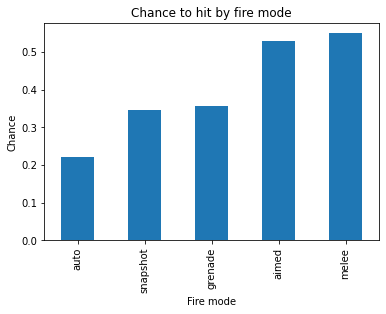

In [7]:
ax = weapon_firemodes_to_hit.plot.bar(title="Chance to hit by fire mode", legend=False)
ax.set_xlabel("Fire mode")
ax.set_ylabel("Chance")

## Damage

In [8]:
weapon_firemodes_damage = weapon_firemodes[["damage_expected"]]
weapon_firemodes_damage = weapon_firemodes_damage.sort_values(by=["damage_expected"])

Text(0, 0.5, 'Damage')

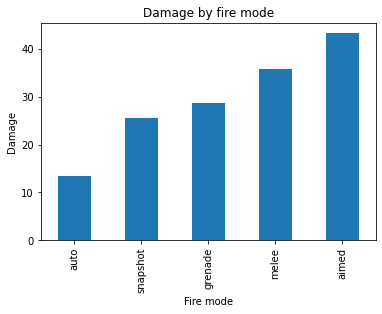

In [9]:
ax = weapon_firemodes_damage.plot.bar(title="Damage by fire mode", legend=False)
ax.set_xlabel("Fire mode")
ax.set_ylabel("Damage")

## Time Units

In [10]:
weapon_firemodes_tus = weapon_firemodes[["time_units"]]
weapon_firemodes_tus = weapon_firemodes_tus.sort_values(by=["time_units"])

Text(0, 0.5, 'Time units')

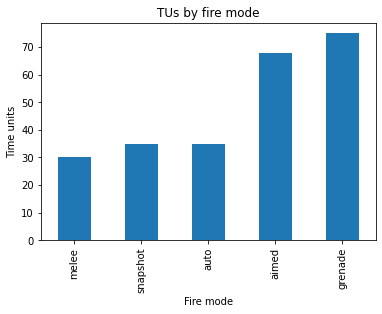

In [11]:
ax = weapon_firemodes_tus.plot.bar(title="TUs by fire mode", legend=False)
ax.set_xlabel("Fire mode")
ax.set_ylabel("Time units")